In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [163]:
# Define the class for Lattice
class Lattice(object):
    """A user-defined data structure that stores and manipulates lattice (2D - arrays)
    """

    def __init__(self, width, height, p):
        """Constructs a board of width and height"""
        self.height = height
        self.width = width
        self.init_random = np.random.rand(self.height, self.width)
        self.data = np.zeros(shape = (height,width))
        self.p = p
        self.clusters = []
        self.visited = set()
        
        for i in range(0, height):
            for j in range(0, width):
                # if a random number is less than the probability picked, fill the lattice
                if self.init_random[i][j] <= self.p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
                    
    
    def __repr__(self):
        """Creates a 2D representation of the board object"""
        plt.imshow(self.data, cmap='gray')
        plt.show()
        return ""
    
    def clear(self):
        """clears the board, making the board only contain ' ' strings
        Return: nothing, the 2D array is changed
        """
        for i in range(0, self.height):
            for j in range(0, self.width):
                # clears the data and all of the arrays that have to do with the data
                self.data[i][j] = 0
                self.clusters = []
                self.visited.clear()

                
    def random_populate(self, new_p):
        self.clear()
        self.init_random = np.random.rand(self.height, self.width)
        self.data = np.zeros(shape = (self.height,self.width))
        for i in range(0, self.height):
            for j in range(0, self.width):
                # if a random number is less than the probability picked, fill the lattice
                if self.init_random[i][j] <= new_p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
        return self
    
    def change_probability(self, new_p):
        self.clear()
        for i in range(0, self.height):
            for j in range(0, self.width):
                # if a random number is less than the probability picked, fill the lattice
                if self.init_random[i][j] <= new_p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
        return self
    
    def color_spanning_cluster(self):
        """Colors spanning clusters """
        num_clusters, clusters, spanning = self.get_clusters()
        span_data = self.data
        if spanning != []:
            for i in range(self.height):
                for j in range(self.width):
                    if (i, j) in spanning[0]:
                        span_data[i][j] = -1
            plt.imshow(span_data, cmap='gray')
            plt.show()
        return ""

    def get_clusters(self):
        """From a lattice, returns the number of clusters, the list of clusters and the tuples for each cell that
        makes up the cluster, and any spanning cluster. """
        
        span_clusters = []
        
        # find all clusters, double counting is ok
        for i in range(self.height):
            for j in range(self.width):
                if self.data[i][j] == 1 and (i, j) not in self.visited:
                    cluster = self.finish_cluster(i,j)
                    self.clusters.append(cluster)

        # assume we are always doing squares
        for cluster in self.clusters:
            if len(cluster) >= self.height and cluster not in span_clusters:
                for cell in cluster:
                    # if the cluster has a cell at row = 0 and col = 0
                    if cell[0] == 0 and cell[1] == 0:
                        for second_cell in cluster:
                            if (second_cell[0] == self.width - 1) or (second_cell[1] == self.height - 1):
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                        
                    # if the cluster has a cell at col = 0
                    if cell[0] == 0:
                        for second_cell in cluster:
                            if second_cell[0] == self.width - 1:
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                                
                                
                    # if the cluster has a cell at row = 0
                    if cell[1] == 0:
                        for second_cell in cluster:
                            if second_cell[1] == self.height - 1:
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                                


        
        num_clusters = len(self.clusters)      
        return num_clusters, self.clusters, span_clusters
    
    def finish_cluster(self, i, j):
        """Helper function to get_clusters. finish_cluster is a recursive function that returns all adjacent
        cells to a given cell that read 1. Returns a list """
        if not (0 <= i < self.height and 0 <= j < self.width):
             return []
        if self.data[i][j] != 1 or (i, j) in self.visited:
            return []
        self.visited.add((i, j))
        res = [(i, j)]
        res += self.finish_cluster(i-1, j)
        res += self.finish_cluster(i+1, j)
        res += (self.finish_cluster(i, j+1))
        res += (self.finish_cluster(i,j-1))
        return res 




In [164]:
lattice = Lattice(10,10,0.7)

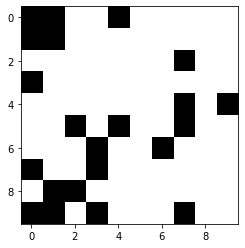


[[0.76397612 0.73920248 0.58697212 0.55294338 0.92242676 0.08406283
  0.41074833 0.66098064 0.14629224 0.24763984]
 [0.83552064 0.77718944 0.61467134 0.57697514 0.63997529 0.31487936
  0.14230602 0.44651946 0.19799792 0.4154249 ]
 [0.29445044 0.24950395 0.2855157  0.05380027 0.19311806 0.30488629
  0.6135737  0.77549309 0.55461985 0.01551835]
 [0.83792093 0.40281677 0.37930005 0.12475131 0.33285336 0.43414534
  0.30196753 0.25055799 0.51206751 0.57259548]
 [0.5970941  0.51591137 0.25194303 0.09108915 0.56132054 0.05606673
  0.54802792 0.80165867 0.42116521 0.87902711]
 [0.36140205 0.34062594 0.70012442 0.30989903 0.74415818 0.27265807
  0.29316288 0.85373006 0.28345233 0.61691762]
 [0.31318669 0.2748321  0.63426354 0.71059575 0.24672109 0.5288842
  0.82124265 0.00184086 0.14182111 0.10692936]
 [0.89205915 0.00111388 0.57596189 0.85065577 0.54471095 0.20351033
  0.63001312 0.07612416 0.29699648 0.12173282]
 [0.13756893 0.77902074 0.77563355 0.34448681 0.14945173 0.39028147
  0.20873635

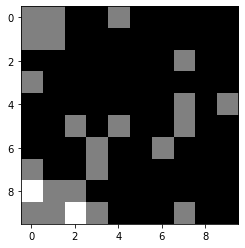

''

In [165]:
print(lattice)
print(lattice.init_random)
lattice.color_spanning_cluster()

In [166]:
lattice_new = lattice.change_probability(0)
print(lattice_new.data)
num_clusters, clusters, spanning = lattice_new.get_clusters()
print(lattice_new.get_clusters()[2])
lattice_new.get_clusters()[2]

print(f"Number of clusters: {num_clusters}")
print()
print(f"Clusters: \n {clusters}")
print()
print(f"Number of Spanning Clusters: {len(spanning)}")
print()
print(f"Spanning Clusters: \n {spanning}")

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[]
Number of clusters: 0

Clusters: 
 []

Number of Spanning Clusters: 0

Spanning Clusters: 
 []


In [178]:
threshold = []
board = Lattice(80,80,0)

for i in np.arange(0,0.1,0.01):
    lat = board.random_populate(i)
    for j in np.arange(i, 1.05, 0.05):
        lat_new = lat.change_probability(j)
        #print(lat_new)
        num_clusters, clusters, spanning = lat_new.get_clusters()
        #print(num_clusters,clusters,spanning)
        if spanning != []:
            threshold.append(j)
            break
            
print(threshold)
print(sum(threshold) / len(threshold))


[0.6000000000000001, 0.56, 0.6200000000000001, 0.5800000000000001, 0.64, 0.6000000000000001, 0.6100000000000001, 0.6200000000000001, 0.63, 0.5900000000000002]
0.6050000000000001
